<a href="https://colab.research.google.com/github/Pratik007-og/Machine-Learning-/blob/master/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import cifar10


In [4]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [5]:
print(type(x_train))

<class 'numpy.ndarray'>


In [7]:
print('x_train shape:',x_train.shape)
print('y_train shape:',y_train.shape)
print('x_test shape:',x_test.shape)
print('y_test shape:',y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [8]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

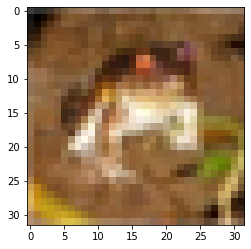

In [9]:
import matplotlib.pyplot as plt
img = plt.imshow(x_train[0])

In [13]:
print('The label is:',y_train[0])

The label is: [6]


In [14]:
#One-Hot Encoding: Convert the labels into a set of 10 numbers to input into the NN
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

#print the new labels 
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [15]:
print(y_test_one_hot[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [0]:
#Normalise the pixels to be values in between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

In [0]:
#Build the CNN
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#Create the architecture
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [0]:
#Compile the model
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
#Train the model
hist = model.fit(x_train, y_train_one_hot, batch_size=256, epochs=10, validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 39s 1ms/step - loss: 1.6224 - accuracy: 0.4172 - val_loss: 1.3769 - val_accuracy: 0.5134
Epoch 2/10
35000/35000 [==============================] - 38s 1ms/step - loss: 1.3136 - accuracy: 0.5345 - val_loss: 1.2667 - val_accuracy: 0.5529
Epoch 3/10
35000/35000 [==============================] - 38s 1ms/step - loss: 1.1812 - accuracy: 0.5835 - val_loss: 1.1960 - val_accuracy: 0.5830
Epoch 4/10
35000/35000 [==============================] - 38s 1ms/step - loss: 1.0939 - accuracy: 0.6179 - val_loss: 1.1020 - val_accuracy: 0.6150
Epoch 5/10
35000/35000 [==============================] - 38s 1ms/step - loss: 1.0020 - accuracy: 0.6505 - val_loss: 1.0608 - val_accuracy: 0.6248
Epoch 6/10
35000/35000 [==============================] - 38s 1ms/step - loss: 0.9323 - accuracy: 0.6743 - val_loss: 1.0297 - val_accuracy: 0.6415
Epoch 7/10
35000/35000 [==============================] - 38s 1ms/st

In [22]:
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 4s 362us/step


0.6725000143051147

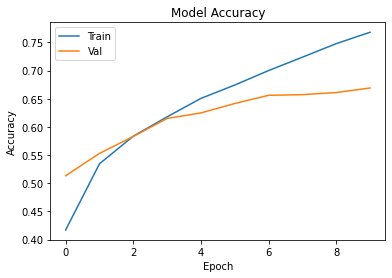

In [24]:
#Visualize the model's accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'])
plt.show()

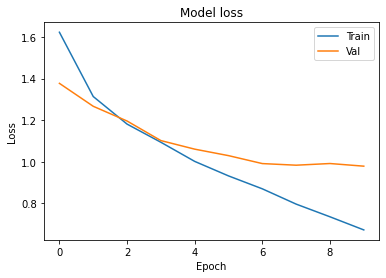

In [25]:
#Visualize the model's loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

In [35]:
#Load the data
from google.colab import files
uploaded = files.upload()
my_image = plt.imread('deer.jpg')

Saving deer.jpg to deer.jpg


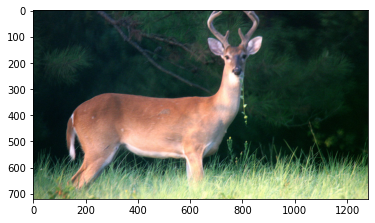

In [36]:
#Show the uploaded image
img = plt.imshow(my_image)

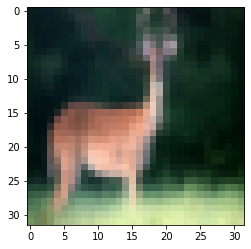

In [37]:
#Resize the image
from skimage.transform import resize
my_resized_img = resize(my_image, (32, 32, 3))
img = plt.imshow(my_resized_img)

In [38]:
#Get the probabilities for each class
import numpy as np
probs = model.predict( np.array( [my_resized_img,] ))

print(probs)

[[1.4443088e-03 5.5489625e-04 1.2716919e-02 6.5084547e-02 7.9980123e-01
  9.0148002e-03 1.7757398e-04 1.8148135e-02 9.2667844e-03 8.3790876e-02]]


In [41]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probs[0,:])
print(index)

[6 1 0 5 8 2 7 3 9 4]


In [42]:
print('Most Likely Class: ', number_to_class[index[9]], 'probability:', probs[0, index[9]])

Most Likely Class:  deer probability: 0.79980123


In [0]:
#Save the model
model.save('Image_Classification')

In [0]:
#Load the model
from keras.models import load_model
model = load_model('Image_Classification')